## I.Naive Bayes Algorithm

The Naive Bayes algorithm is a probabilistic classifier founded on Bayes' theorem, accompanied by strong independence assumptions between the features. It receives the moniker "naive" due to its assumption that the features are independent of one another. Although this assumption often does not hold true in real-world datasets, the algorithm remains effective in numerous applications.

#### Bayes' Theorem

The cornerstone of the Naive Bayes algorithm is Bayes' theorem. Mathematically expressed, Bayes' theorem is:

$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$

Where:

- $P(A|B) $ represents the posterior probability of class \( A \) given predictor \( B \).
- $P(A)$ is the prior probability or marginal likelihood of the class.
- $P(B|A)$ is the likelihood, which denotes the probability of the predictor given the class.
- $P(B)$ is the prior probability of the predictor.

#### Working of the Naive Bayes Algorithm

Given a dataset with features $X_1, X_2, \dots, X_n$ and a target variable $Y$ (which is categorical and may assume values $y_1, y_2, \dots, y_k$, the Naive Bayes classifier operates as follows:

1. **Training Phase**: During this phase, the algorithm computes the probabilities $P(X_i|Y=y_j)$ for each feature $X_i$ and each class $y_j$.
2. **Prediction Phase**: To predict a new data point, the algorithm calculates the posterior probability for each class using Bayes' theorem. The class exhibiting the highest posterior probability becomes the prediction.

Mathematically, the prediction is:

$
y = \arg \max_{y_j} P(Y=y_j) \prod_{i=1}^{n} P(X_i|x_i, Y=y_j)
$

Where:

1. $y$ is the predicted class label for a given instance or data point.
2. $\arg \max_{y_j}$ denotes the class label $y_j$ that maximizes the following probability expression.
3. $P(Y=y_j$ is the prior probability of the class $y_j$, representing the frequency of class $y_j$ in the training data.
4. $\prod_{i=1}^{n}$ signifies the multiplication of probabilities for each feature $X_i$ given its value $x_i$ and the class $Y=y_j$.
5. $P(X_i|x_i, Y=y_j)$ is the conditional probability of feature $X_i$ having the value $x_i$ given the class $y_j$.

The objective during prediction is to compute the posterior probability for each class $y_j$ based on the provided features $X_1, X_2, \dots, X_n$. The class with the highest posterior probability is designated as the prediction. The posterior probability is calculated using Bayes' theorem, and the classifier computes a value proportional to the true posterior. The factor of proportionality is consistent across all classes and does not influence the determination of the class with the maximum value.

#### Variants of the Naive Bayes Algorithm

Several variants of the Naive Bayes algorithm exist, with each tailored for a specific data type:

1. **Gaussian Naive Bayes**: This variant assumes that continuous features are normally distributed.
2. **Multinomial Naive Bayes**: It is suitable for discrete data and is commonly employed for text classification problems.
3. **Bernoulli Naive Bayes**: This is ideal for binary or boolean features.

#### Advantages

1. **Simplicity**: The algorithm is straightforward to understand and implement.
2. **Scalability**: The algorithm scales linearly with the number of predictors and data points.
3. **Efficacy with High-dimensional Datasets**: Due to its performance and scalability, it is particularly favored for text classification problems.
4. **Minimal Training Data Requirement**: A small amount of training data is sufficient to estimate the parameters necessary for classification.

#### Disadvantages

1. **Assumption of Feature Independence**: Real-world datasets rarely meet the assumption of independent features.
2. **Potential for Data Scarcity Issues**: If a category is not represented in the training data, the probability for that category might be computed as zero. Techniques such as Laplace smoothing can address this limitation.
3. **Suboptimal Estimation**: While the Naive Bayes algorithm excels as a classifier, the probability outputs from the 'predict_proba' function are not entirely reliable.

#### Hybrid Naive Bayes Approach

In traditional applications of the Naive Bayes algorithm, a singular variant is typically employed. However, when datasets are encountered with diverse feature types, both continuous and discrete, a singular approach may not be optimal. This observation has led to the development of the hybrid approach to the Naive Bayes algorithm.

In this hybrid methodology, different variants of Naive Bayes are combined to cater to the specific nature of each feature. The continuous numerical features are processed using the Gaussian Naive Bayes, as these features are often assumed to follow a normal (Gaussian) distribution. On the other hand, the discrete categorical features are handled by the Multinomial or Bernoulli Naive Bayes, given their suitability for discrete data types.

During the prediction phase, results from the multiple Naive Bayes models are integrated to yield a final prediction. By employing this strategy, the nature of each feature is more adequately addressed compared to using a singular Naive Bayes variant.

The hybrid approach aims to harness the strengths of the respective Naive Bayes variants. By adapting to the nature of the data, improved classification performance is potentially achieved.

## II.Algorithm Implementation

### Dataset 1: Dinosaurs

Dataset provides a comprehensive overview of various dinosaurs, their dietary habits, their geological time frames, and the locations where their fossils were discovered.Below a description of the labels:

Lat: Latitude of the location where the dinosaur fossil was found.

Lng: Longitude of the location where the dinosaur fossil was found.

What Dinosaurs Eat: A general categorization of the dinosaur's diet (e.g., plant, flesh).

Accepted Name: The accepted scientific name of the dinosaur.

Country: The country where the dinosaur fossil was found.

Cc: Country code corresponding to the country of discovery.

Diet: A more detailed categorization of the dinosaur's diet (e.g., herbivore, carnivore, omnivore).

Early Interval: Geological interval marking the early period of the dinosaur's existence.

Formation: The geological formation where the fossil was discovered.

Geological Interval: The specific geological interval in which the dinosaur existed.

Geological Time Period: The broader geological time period, such as Jurassic or Cretaceous.

Ref Author: The author(s) of the reference or study from which this data was sourced.

Ref Pubyr: The publication year of the reference.

State: The state or province where the fossil was found (if applicable).

Max Ma: The maximum million years ago (Ma) estimation for the existence of the dinosaur.

Min Ma: The minimum million years ago (Ma) estimation for the existence of the dinosaur.

### Implementation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv ('kaggle.csv')
df

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2459,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2460,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2461,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60


In [2]:
df = df.drop(columns=['What Dinosaurs Eat', 'Cc'])
df

,Lat,Lng,Accepted Name,Country,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,Chaoyangsaurus youngi,China,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,Protarchaeopteryx robusta,China,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,Caudipteryx zoui,China,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,Gorgosaurus libratus,Canada,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,Gorgosaurus libratus,Canada,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,Hesperornis chowi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2459,49.183334,-98.099998,Hesperornis macdonaldi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2460,49.183334,-98.099998,Hesperornis macdonaldi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2461,49.183334,-98.099998,Hesperornis chowi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60


The label 'What Dinosaurs Eat' was eliminated because it could be viewed as observations equivalent to the dinosaur's diet, the target value that was intended to be predicted. 'Cc' was considered redundant due to the presence of the 'Country' label.

In [3]:
df_encoded = pd.get_dummies(df, columns=['Accepted Name', 'Country', 'Early Interval', 'Formation', 'Geological Interval', 'Geological Time Period', 'Ref Author', 'State'])
df_encoded

,Lat,Lng,Diet,Ref Pubyr,Max Ma,Min Ma,Accepted Name_Aberratiodontus wui,Accepted Name_Abrosaurus dongpoensis,Accepted Name_Abydosaurus mcintoshi,Accepted Name_Achelousaurus horneri,...,State_South Dakota,State_Texas,State_Utah,State_Virginia,State_Wyoming,State_Xinjiang,State_Xizang,State_Yukon,State_Yunnan,State_Zhejiang
0,42.933300,123.966698,herbivore,1992,150.8,132.90,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,41.799999,120.733330,omnivore,1998,130.0,122.46,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,41.799999,120.733330,omnivore,1997,130.0,122.46,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,50.740726,-111.528732,carnivore,1922,83.5,70.60,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50.737015,-111.549347,carnivore,1970,83.5,70.60,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,piscivore,2016,83.5,70.60,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2459,49.183334,-98.099998,piscivore,2016,83.5,70.60,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2460,49.183334,-98.099998,piscivore,2016,83.5,70.60,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2461,49.183334,-98.099998,piscivore,2016,83.5,70.60,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Separate the features and target
x = df_encoded.drop(columns=['Diet'])
x

,Lat,Lng,Ref Pubyr,Max Ma,Min Ma,Accepted Name_Aberratiodontus wui,Accepted Name_Abrosaurus dongpoensis,Accepted Name_Abydosaurus mcintoshi,Accepted Name_Achelousaurus horneri,Accepted Name_Acheroraptor temertyorum,...,State_South Dakota,State_Texas,State_Utah,State_Virginia,State_Wyoming,State_Xinjiang,State_Xizang,State_Yukon,State_Yunnan,State_Zhejiang
0,42.933300,123.966698,1992,150.8,132.90,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,41.799999,120.733330,1998,130.0,122.46,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,41.799999,120.733330,1997,130.0,122.46,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,50.740726,-111.528732,1922,83.5,70.60,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50.737015,-111.549347,1970,83.5,70.60,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,2016,83.5,70.60,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2459,49.183334,-98.099998,2016,83.5,70.60,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2460,49.183334,-98.099998,2016,83.5,70.60,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2461,49.183334,-98.099998,2016,83.5,70.60,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Target Value
y = df_encoded['Diet']
y

0       herbivore
1        omnivore
2        omnivore
3       carnivore
4       carnivore
          ...    
2458    piscivore
2459    piscivore
2460    piscivore
2461    piscivore
2462    piscivore
Name: Diet, Length: 2463, dtype: object

In [6]:
# Split Features and Target Value
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
# Separate the data into numerical and categorical subsets
numerical_features = ['Lat', 'Lng', 'Max Ma', 'Min Ma']
categorical_features = list(set(x_train.columns) - set(numerical_features))

# Split the training data
X_train_numerical = x_train[numerical_features]
X_train_categorical = x_train[categorical_features]

# Split the test data
X_test_numerical = x_test[numerical_features]
X_test_categorical = x_test[categorical_features]

In [8]:
# Initialize the models
gnb = GaussianNB()
mnb = MultinomialNB()

# Train the models
gnb.fit(X_train_numerical, y_train)
mnb.fit(X_train_categorical, y_train)

# Predict probabilities on the test set
gnb_probs = gnb.predict_proba(X_test_numerical)
mnb_probs = mnb.predict_proba(X_test_categorical)

# Combine the probabilities (multiply)
combined_probs = gnb_probs * mnb_probs

# Predictions
y_pred = combined_probs.argmax(axis=1)

In [9]:
# Convert to integer labels
label_encoder = LabelEncoder().fit(y)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the performance
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7505070993914807


Next, the algorithm is implemented with a "Univariate Approach" or "Gaussian Naive Bayes" to make a comparison.

In [10]:
df

,Lat,Lng,Accepted Name,Country,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,Chaoyangsaurus youngi,China,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,Protarchaeopteryx robusta,China,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,Caudipteryx zoui,China,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,Gorgosaurus libratus,Canada,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,Gorgosaurus libratus,Canada,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,Hesperornis chowi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2459,49.183334,-98.099998,Hesperornis macdonaldi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2460,49.183334,-98.099998,Hesperornis macdonaldi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2461,49.183334,-98.099998,Hesperornis chowi,Canada,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60


In [11]:
# Applying LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,Lat,Lng,Accepted Name,Country,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,132,1,2,49,176,27,1,101,1992,27,150.8,132.90
1,41.799999,120.733330,571,1,4,37,203,4,0,215,1998,27,130.0,122.46
2,41.799999,120.733330,117,1,4,37,203,4,0,214,1997,27,130.0,122.46
3,50.740726,-111.528732,288,0,0,40,41,8,0,293,1922,2,83.5,70.60
4,50.737015,-111.549347,288,0,0,40,41,8,0,370,1970,2,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,324,0,5,17,141,8,0,1,2016,29,83.5,70.60
2459,49.183334,-98.099998,328,0,5,17,141,8,0,1,2016,29,83.5,70.60
2460,49.183334,-98.099998,328,0,5,17,141,8,0,1,2016,29,83.5,70.60
2461,49.183334,-98.099998,324,0,5,17,141,8,0,1,2016,29,83.5,70.60


In [12]:
X =  df.drop(columns=['Diet'])
X

,Lat,Lng,Accepted Name,Country,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,132,1,49,176,27,1,101,1992,27,150.8,132.90
1,41.799999,120.733330,571,1,37,203,4,0,215,1998,27,130.0,122.46
2,41.799999,120.733330,117,1,37,203,4,0,214,1997,27,130.0,122.46
3,50.740726,-111.528732,288,0,40,41,8,0,293,1922,2,83.5,70.60
4,50.737015,-111.549347,288,0,40,41,8,0,370,1970,2,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,324,0,17,141,8,0,1,2016,29,83.5,70.60
2459,49.183334,-98.099998,328,0,17,141,8,0,1,2016,29,83.5,70.60
2460,49.183334,-98.099998,328,0,17,141,8,0,1,2016,29,83.5,70.60
2461,49.183334,-98.099998,324,0,17,141,8,0,1,2016,29,83.5,70.60


In [13]:
Y = df['Diet']
Y

0       2
1       4
2       4
3       0
4       0
       ..
2458    5
2459    5
2460    5
2461    5
2462    5
Name: Diet, Length: 2463, dtype: int32

In [14]:
# Split Features and Target Value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train Univariate Model
gnb_univariate = GaussianNB()
gnb_univariate.fit(X_train, Y_train)

# Predictions
y_pred_univariate = gnb_univariate.predict(X_test)

In [15]:
# Evaluate the performance
accuracy_univariate = accuracy_score(Y_test, y_pred_univariate)
print(f"Accuracy hybrid: {accuracy}")
print(f"Accuracy: {accuracy_univariate}")

Accuracy hybrid: 0.7505070993914807
Accuracy: 0.3488843813387424


### Results Dinosaurs Dataset

The hybrid approach, which combined Gaussian Naive Bayes for numerical features and Multinomial Naive Bayes for categorical ones, achieved an accuracy of approximately 75%. In contrast, the univariate approach, relying solely on Gaussian Naive Bayes for the entire dataset, produced an accuracy of around 34.9%.

This difference in performance demonstrates the importance of properly handling various types of features within a data set. By addressing the specific nature of each feature through a custom Naive Bayes variant, the hybrid method had better performance in dealing with the dataset.

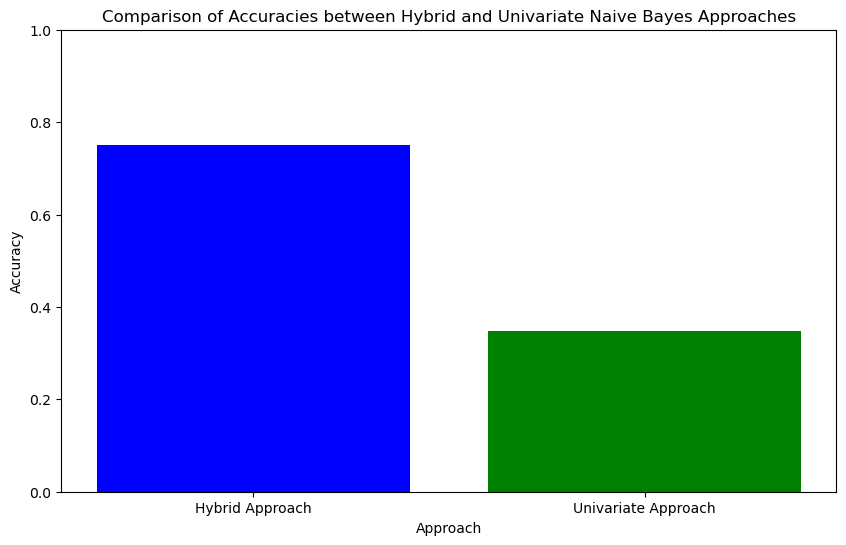

In [16]:
accuracies = [accuracy,accuracy_univariate]
methods = ['Hybrid Approach', 'Univariate Approach']

# Graphing
plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies between Hybrid and Univariate Naive Bayes Approaches')
plt.ylim(0, 1)
plt.show()